# Multi terrain probabistic sensing

# About this file

This file is to use the functionalities of the classes defined in the other file.

## Legend:
White -> FLAT<br>
Light grey-> HILLY<br>
Dark grey->FOREST<br>
Black-> BLOCK


In [17]:
%run a_star_2.ipynb
%run agent_8.ipynb
import numpy as np
import random
from matplotlib import cm

In [18]:
maze_size

0

# Code for Agent 8 goes here

In [19]:
def display2(matrix):
    """
    This function is used to display maze with traversed path(highlighted)
    trajectory_path: path traversed by the agent so far
    matrix: maze of the problem
    """
    temp = matrix.copy()
    colormap = cm.get_cmap("Greys")
    plt.imshow(temp, cmap=colormap)
    plt.show()

In [20]:
def run_agent_8(agent8, maze):
#     print("Agent6 started.\nMaze Size: ",maze_size," Source: ",maze.source," Target: ",maze.target)
    global maze_size
    source = maze.source
    terrain_matrix = maze.terrain_matrix
    full_grid_world_matrix = maze.full_grid_world_matrix
    agent_gridworld = agent8.agent_gridworld

    current_target_type = 1
    current_target2 = (0,0)
    
    target_reached = False
    
    while not target_reached:
        
        if current_target_type == 1:
            current_target = agent8.getMaxProbabilityCellDivideByDistance(source, maze_size)
            current_target2 = agent8.getMaxCertaintyCell(source)
            current_target_type = 2
        else:
            current_target = current_target2
            current_target_type = 1
        
        initialize(maze_size,0.3)
        path = astar(source,current_target, agent8.agent_gridworld_0_1)
        if(len(path)==0):
            agent8.agent_gridworld_0_1[current_target[0],current_target[1]] = 1
            agent8.update_cells_when_xy_blocked(current_target[0], current_target[1], maze_size)
            agent8.update_certainties(maze)
            
            agent8.agent_gridworld.itemset(current_target,3)
            maze.full_grid_world_matrix[current_target[0],current_target[1]] =1
            maze.terrain_matrix[current_target[0],current_target[1]] = 3
            continue
        
        for i in range(len(path)):
            node = path[i]
            agent8.actions += 1
            if full_grid_world_matrix.item(node) == 0:
                terrain_type = terrain_matrix.item(node)
                agent8.visited_matrix.itemset(node, True)
                agent8.agent_gridworld.itemset(node, terrain_type)
                if i == len(path)-1:
                    agent8.actions += 1
                    if(terrain_type == 0):
                        agent8.flat_exam += 1
                    elif(terrain_type == 1):
                        agent8.hilly_exam += 1
                    else:
                        agent8.forest_exam += 1
                    if(agent8.examine(node, terrain_type, maze)):
                        print("found goal")
                        target_reached = True
                        break
                    else:
                        #update probabiities when failed to be found and terrain type=terrain_matrix.item(node)
                        agent8.update_cells_when_xy_failed_with_some_terrainType(node[0], node[1], terrain_type, maze_size)
                        agent8.update_certainties(maze)
                        source = path[i]
#                         print(agent6.belief_matrix)
                        break
            elif full_grid_world_matrix.item(node) == 1:
                agent8.actions += 2
#                 print(node,'<-cell blocked, replanning route')
                #agent6.update_probabilities(node,'blocked')
                agent8.agent_gridworld_0_1[node[0],node[1]] = 1
#                 print("In node:",node,"\nbefore: ",agent6.belief_matrix)
                agent8.update_cells_when_xy_blocked(node[0], node[1], maze_size)
                agent8.update_certainties(maze)
                agent8.agent_gridworld.itemset(node,3)
                source = path[i-1]
#                 print("after:",agent6.belief_matrix)
                break


# Agent 8 type 2

# Main function

Maze size: 50 
Source:  (35, 30) 
Target: (23, 41) 
maze:


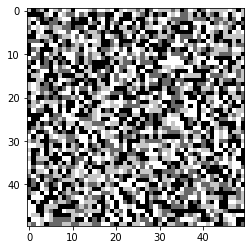

found goal


In [27]:
if __name__ == "__main__":

    #Initialize Maze
    maze_size = 50
    maze = gridworld(maze_size)
    
    # set source and target
    initialize(maze_size,0.3)
#     print(maze.source,maze.target, maze.full_grid_world_matrix)
    path = astar(maze.source, maze.target, maze.full_grid_world_matrix)
    while(len(path)==0):
        print("finding valid source and target")
        maze.source, maze.target = maze.set_valid_source_target(maze_size)
        initialize(maze_size,0.3)
        path = astar(maze.source, maze.target, maze.full_grid_world_matrix)
    
    # Initialize Agent 6
    agent8 = agent_8(maze_size)
    
    #Print all details
    print("Maze size:",maze_size,"\nSource: ",maze.source,"\nTarget:",maze.target,"\nmaze:")
    display2(maze.terrain_matrix)
    #runnning Agent 6 on maze
    run_agent_8(agent8, maze)

In [22]:
# print(type(maze.full_grid_world_matrix))


# Test Matrix

In [150]:
# maze_size = 3
# maze = gridworld(maze_size)
# maze.terrain_matrix = np.asmatrix([[0,2,1],[3,3,0],[3,1,2]])
# maze.full_grid_world_matrix = np.asmatrix([[0,0,0],[1,1,0],[1,0,0]])
# maze.source = (0,0)
# maze.target = (2,1)


# agent8 = agent_8(maze_size)

Maze size: 3 
Source:  (0, 0) 
Target: (2, 1) 
maze:


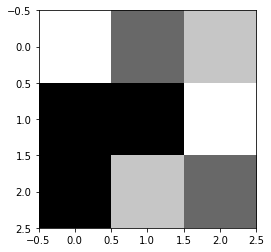

In [151]:
# plt.spy(maze.full_grid_world_matrix)
# print("Maze size:",maze_size,"\nSource: ",maze.source,"\nTarget:",maze.target,"\nmaze:")
# display2(maze.terrain_matrix)

In [163]:
# run_agent_8(agent8, maze)

# Testing done